In [2]:
# import libraries and define global settings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt

# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [3]:
N = 30
data = np.random.randn(N)
data[data<-1] = data[data<-1]+2
data[data>1.5] = data[data>1.5]**2; # force a few outliers


# pick a lenient threshold just for illustration
zscorethresh = 2
dataZ = (data-np.mean(data)) / np.std(data,ddof=1)


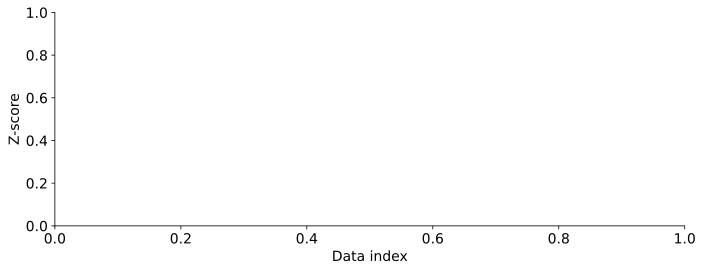

In [4]:
plt.figure(figsize=(10,4))

colorz = 'brkmc'
numiters = 0 # iteration counter
while True:

  # convert to z
  datamean = np.nanmean(dataZ)
  datastd  = np.nanstd(dataZ,ddof=1)
  dataZ = (dataZ-datamean) / datastd

  # find data values to remove
  toremove = dataZ>zscorethresh

  # break out of while loop if no points to remove
  if sum(toremove)==0:
    break
  else:
    # otherwise, mark the outliers in the plot
    plt.plot(np.where(toremove)[0]+numiters/5,dataZ[toremove],'%sx'%colorz[numiters],
             markersize=12,markeredgewidth=3)
    dataZ[toremove] = np.nan

  # replot
  plt.plot(np.arange(N)+numiters/5,dataZ,linestyle='None',marker=f'${numiters}$',markersize=12,
           color=colorz[numiters])

  # update counter
  numiters = numiters + 1

# labels
plt.ylabel('Z-score')
plt.xlabel('Data index')

# display the figure
plt.tight_layout()
plt.show()
     

# Exe 2

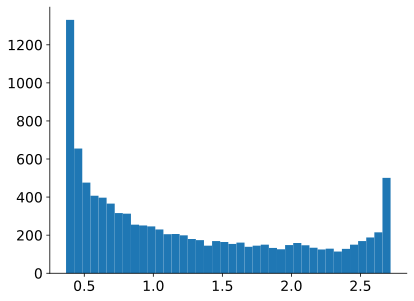

In [5]:
# create data
N = 10000
Y = np.exp(np.sin(np.random.randn(N)))

# make a copy of the data to manipulate
Yc = Y.copy()

# ninspect data
plt.hist(Y,bins=40);
     


In [6]:
# percent to remove (two-tailed)
k = 4

# convert that to a number of data points to remove from each tail
pnts2nan = int( (k/2)/100 * N ) 

# find the data sorting
sort_idx = np.argsort(Y)

# nan the two tails separately
Yc[sort_idx[:pnts2nan]]  = np.nan
Yc[sort_idx[-pnts2nan:]] = np.nan

# confirm the right numbers of points
print(f'Total dataset size: {len(Yc)}')
print(f'Valid dataset size: {np.sum(~np.isnan(Yc))}')

Total dataset size: 10000
Valid dataset size: 9600


In [7]:
# compute the mean and median (also used in the next exercise)
meanY = np.mean(Y)
medianY = np.median(Y)

# print the means
print(f'Mean of original: {meanY:.3f}')
print(f'Mean of trimmed:  {np.nanmean(Yc):.3f}')

# print the medians
print(' ')
print(f'Median of original: {medianY:.3f}')
print(f'Median of trimmed:  {np.nanmedian(Yc):.3f}')

Mean of original: 1.240
Mean of trimmed:  1.227
 
Median of original: 1.012
Median of trimmed:  1.012


# Exe 3

In [8]:
# the range of k values
ks = np.arange(1,50,3)

# initialize a results matrix for mean/median
results = np.zeros((len(ks),2))


# experiment
for idx,ki in enumerate(ks):

  # make a new copy of the original data
  Yc = Y.copy() 

  # convert that to a number of data points to remove from each tail
  pnts2nan = int( (ki/2)/100 * N )

  # nan the two tails separately
  Yc[sort_idx[:pnts2nan]]  = np.nan
  Yc[sort_idx[-pnts2nan:]] = np.nan

  # collect mean and median
  results[idx,0] = 100*(np.nanmean(Yc)-meanY) / meanY
  results[idx,1] = 100*(np.nanmedian(Yc)-medianY) / medianY

  print(f'Total/valid dataset size: {len(Yc)} -> {np.sum(~np.isnan(Yc))}')

Total/valid dataset size: 10000 -> 9900
Total/valid dataset size: 10000 -> 9600
Total/valid dataset size: 10000 -> 9300
Total/valid dataset size: 10000 -> 9000
Total/valid dataset size: 10000 -> 8700
Total/valid dataset size: 10000 -> 8400
Total/valid dataset size: 10000 -> 8100
Total/valid dataset size: 10000 -> 7800
Total/valid dataset size: 10000 -> 7500
Total/valid dataset size: 10000 -> 7200
Total/valid dataset size: 10000 -> 6900
Total/valid dataset size: 10000 -> 6600
Total/valid dataset size: 10000 -> 6300
Total/valid dataset size: 10000 -> 6000
Total/valid dataset size: 10000 -> 5700
Total/valid dataset size: 10000 -> 5400
Total/valid dataset size: 10000 -> 5100


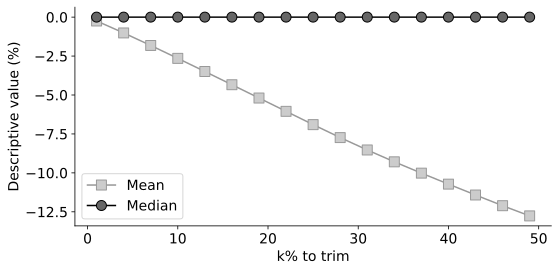

In [9]:
# plot 

plt.figure(figsize=(8,4))
plt.plot(ks,results[:,0],'s-',color=[.6,.6,.6],markerfacecolor=[.8,.8,.8],markersize=10,label='Mean')
plt.plot(ks,results[:,1],'o-',color='k',markerfacecolor=[.4,.4,.4],markersize=10,label='Median')
plt.legend()
plt.xlabel('k% to trim')
plt.ylabel(r'Descriptive value (%)')

# display the figure
plt.tight_layout()
plt.show()

# Exe 4

# Exe 5

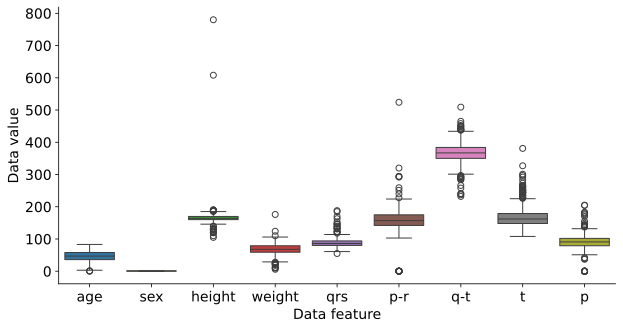

In [12]:
# url reference: https://archive.ics.uci.edu/ml/datasets/Arrhythmia

# import data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data',
                 usecols = np.arange(9),
                 names   = ['age','sex','height','weight','qrs','p-r','q-t','t','p'])

# inspect
df.head()
     

# boxplots of raw data
plt.figure(figsize=(10,5))
sns.boxplot(data=df).set(xlabel='Data feature',ylabel='Data value')
plt.show()
     


In [13]:
# make a copy of the original data matrix
df_z = df.copy()

for col in df_z.columns:
  if not (col=='sex'):
    df_z[col] = (df[col] - df[col].mean()) / df[col].std(ddof=1)

# inspect again
df_z

,age,sex,height,weight,qrs,p-r,q-t,t,p
0,1.732520,0,0.640617,0.713024,0.135355,0.844010,0.113584,0.113683,1.200140
1,0.578671,1,-0.031962,-0.251365,-0.515501,0.420303,1.012179,-0.587912,-1.974876
2,0.457213,0,0.156360,1.617140,3.194376,0.174999,0.562881,0.422385,0.464465
3,0.517942,0,0.237069,1.556865,0.721125,1.044714,0.383162,0.254002,2.051973
4,1.732520,0,0.640617,0.713024,-0.059902,0.576406,-0.215902,0.197875,0.503185
...,...,...,...,...,...,...,...,...,...
447,0.396484,1,-0.166478,0.110281,-0.580586,0.977813,0.443069,-0.447593,1.045261
448,-0.575178,0,0.640617,1.014396,0.721125,-0.404811,-0.185948,0.871406,-0.658406
449,-0.635907,0,-0.005059,-0.010268,1.241809,0.464904,-0.066136,0.674960,1.006541
450,-0.878822,1,-0.300994,-0.793835,0.265526,-1.096123,0.562881,1.348491,-1.045603


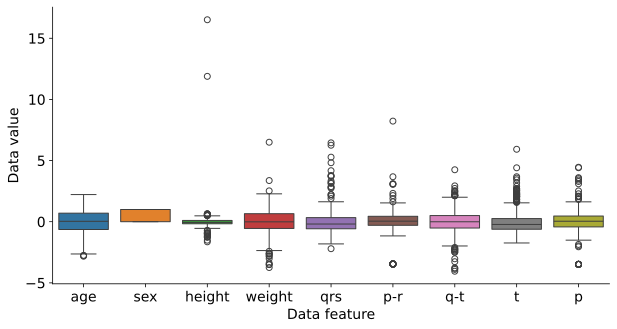

In [14]:
# box plots of z-scored data
plt.figure(figsize=(10,5))
sns.boxplot(data=df_z).set(xlabel='Data feature',ylabel='Data value')
plt.show()

# Exe 6